In [490]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [491]:
cars = pd.read_csv('mtcars.csv')

cars.head(2)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [492]:
cars.tail(2)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.78,18.6,1,1,4,2


In [493]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [494]:
cars_process = cars.drop(columns=['model'])

cars_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


In [495]:
# Test de normalidad

# h0 = las variables de la muestra siguen una distribución normal, p_value < 0.05 se rechaza h0

from scipy.stats import shapiro

var_normal = []
var_no_normal = []

for i in cars_process.columns:
    stat, p = shapiro(cars_process[i])
    print('Variable: ', i)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p >= 0.05:
        var_normal.append(i)
        print('No se puede rechazar la hipótesis nula')
    else:
        var_no_normal.append(i)
        print('Se rechaza la hipótesis nula')
    print('-----------------------------------')
    
print('Variables normales: ', var_normal)
print('Variables no normales: ', var_no_normal)

Variable:  mpg
stat=0.948, p=0.123
No se puede rechazar la hipótesis nula
-----------------------------------
Variable:  cyl
stat=0.753, p=0.000
Se rechaza la hipótesis nula
-----------------------------------
Variable:  disp
stat=0.920, p=0.021
Se rechaza la hipótesis nula
-----------------------------------
Variable:  hp
stat=0.933, p=0.049
Se rechaza la hipótesis nula
-----------------------------------
Variable:  drat
stat=0.946, p=0.110
No se puede rechazar la hipótesis nula
-----------------------------------
Variable:  wt
stat=0.943, p=0.093
No se puede rechazar la hipótesis nula
-----------------------------------
Variable:  qsec
stat=0.973, p=0.594
No se puede rechazar la hipótesis nula
-----------------------------------
Variable:  vs
stat=0.632, p=0.000
Se rechaza la hipótesis nula
-----------------------------------
Variable:  am
stat=0.625, p=0.000
Se rechaza la hipótesis nula
-----------------------------------
Variable:  gear
stat=0.773, p=0.000
Se rechaza la hipótesis n

In [496]:
# Test de correlacion

matrix_corr = cars_process.corr(method='spearman')

<Axes: >

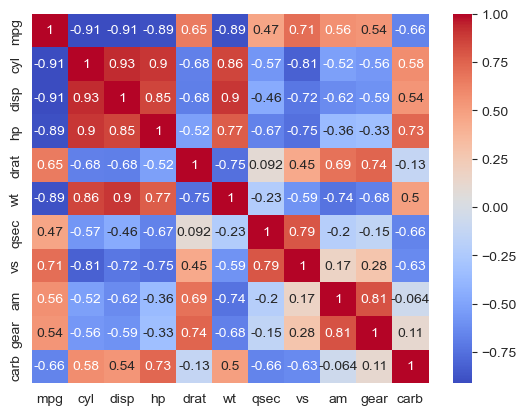

In [497]:
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm')

In [498]:
plt.figure(figsize=(10, 8)) 

# sns.pairplot(cars_process, kind='scatter', diag_kind='kde')

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [499]:
# Variables independientes y dependientes

var_ind = 'mpg'

var_dep = 'wt'

x = cars_process[var_ind].to_numpy()
y = cars_process[var_dep].to_numpy()

x_y = np.array((x, y))

print(f"Shape x: {x.shape}")
print(f"Shape y: {y.shape}")
print(f"Corr: {np.corrcoef(x, y)[0, 1]}")

Shape x: (32,)
Shape y: (32,)
Corr: -0.8676593765172281


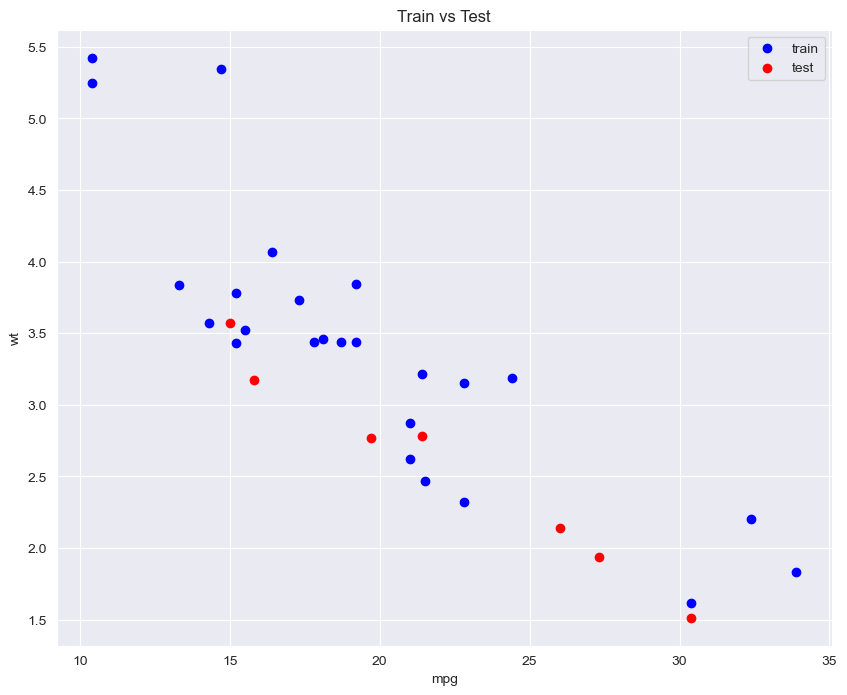

In [500]:
# Vamos a separar los datos en train y test

split = int(0.8* len(x))

train_x = x[:split]
train_y = y[:split]

test_x = x[split:]
test_y = y[split:]

plt.figure(figsize=(10, 8))
plt.scatter(train_x, train_y, color='blue', label='train')
plt.scatter(test_x, test_y, color='red', label='test')
plt.title('Train vs Test')
plt.xlabel(var_ind)
plt.ylabel(var_dep)
plt.legend()

In [501]:
# Regresion lineal

import statsmodels.api as sm

# primero dependiente y despues independiente los parametros de OLS

model = sm.OLS(train_y, train_x)

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.730
Model:                            OLS   Adj. R-squared (uncentered):              0.719
Method:                 Least Squares   F-statistic:                              64.91
Date:                Mon, 19 Aug 2024   Prob (F-statistic):                    2.78e-08
Time:                        21:51:58   Log-Likelihood:                         -50.659
No. Observations:                  25   AIC:                                      103.3
Df Residuals:                      24   BIC:                                      104.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1482      0.018      8.057      0.000       0.110       0.186
==============================================================================
Omnibus:                        0.609   Durbin-Watson:                   0.688
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.239
Skew:                          -0.239   Prob(JB):                        0.887
Kurtosis:                       2.976   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Supuestos de los residuos

1. Linealidad [OK]
2. Independencia de los residuos [OK] 
3. Normalidad de los residuos [OK]
4. Homocedasticidad [OK]
5. Colinealidad (multivariado) [OK]

Text(0.5, 0, 'Predicciones')

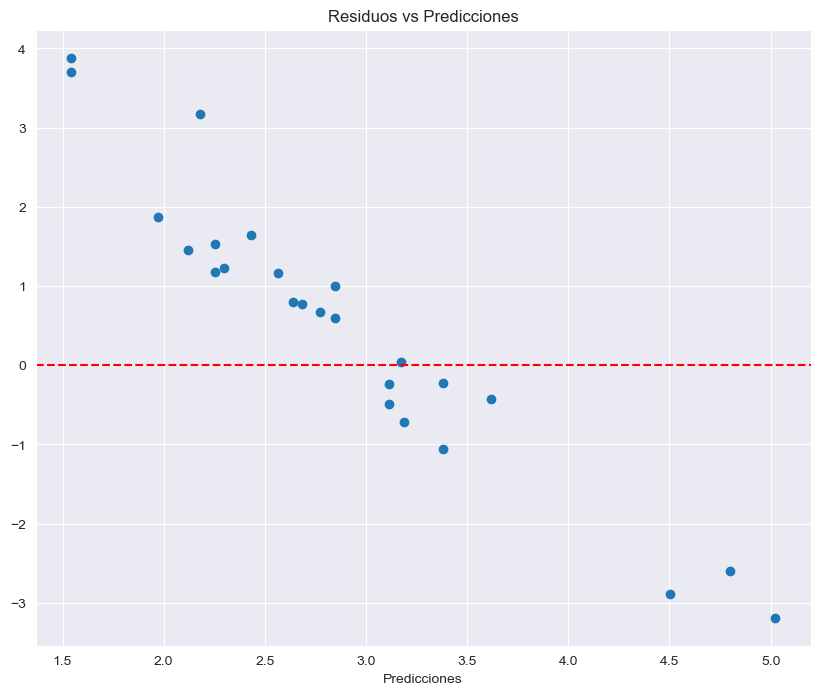

In [502]:
# Linealidad y homocedasticidad

ypred = results.predict(train_x)
residuos = results.resid

plt.figure(figsize=(10, 8))
plt.scatter(ypred, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs Predicciones')
plt.xlabel('Predicciones')

In [503]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(residuos)

np.float64(0.6883336719431353)

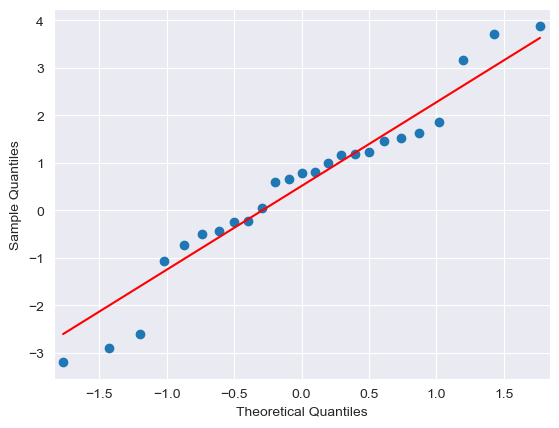

<Figure size 1000x800 with 0 Axes>

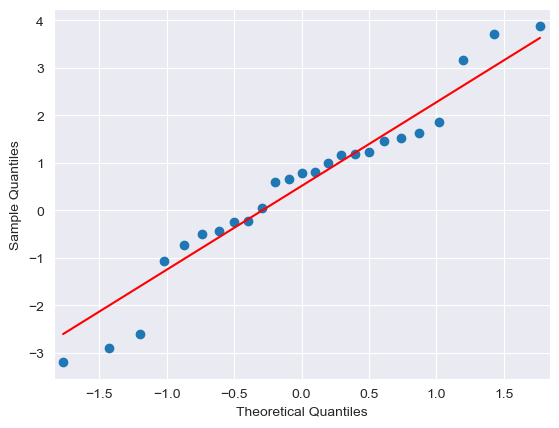

In [504]:
# Normalidad de los residuos

plt.figure(figsize=(10, 8))
sm.qqplot(residuos, line='s')